## Statistics for data science with python "week 7: capstone project"

In [1]:
# Importing necessary libraries
import numpy as np                  # NumPy for numerical operations
import pandas as pd                 # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt     # Matplotlib for plotting
import seaborn as sns               # Seaborn for statistical data visualization
import statsmodels.api as sm        # Statsmodels for statistical modeling
import scipy.stats                  # Scipy for scientific and technical computing
import warnings                     # Warnings for managing warning messages

# Ignore any warning messages for cleaner output
warnings.filterwarnings('ignore')

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Variable Description
**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
df.drop('Unnamed: 0',axis =1, inplace=True)

## Descriptive Statistics and Visualizations

**Q-1**: For the "Median value of owner-occupied homes" provide a boxplot

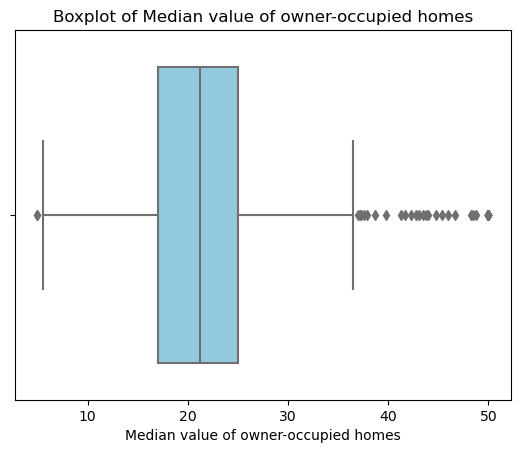

In [5]:
sns.boxplot(data = df,x='MEDV', color='skyblue')
plt.title("Boxplot of Median value of owner-occupied homes")
plt.xlabel("Median value of owner-occupied homes")
plt.show()

**Q-2**:Provide a histogram for the Charles river variable

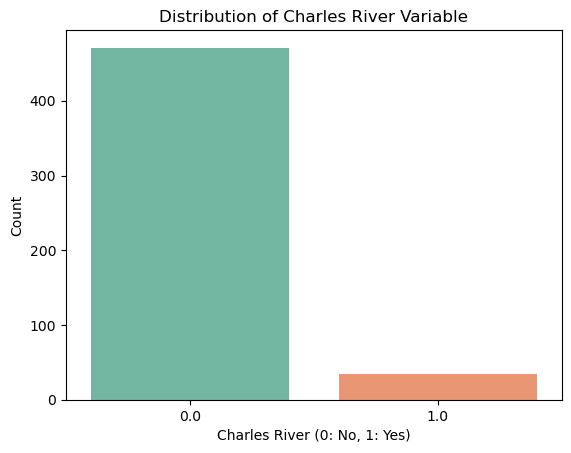

In [6]:
sns.countplot(data=df, x='CHAS', palette='Set2')
plt.title("Distribution of Charles River Variable")
plt.xlabel("Charles River (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

**Q-3**:Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

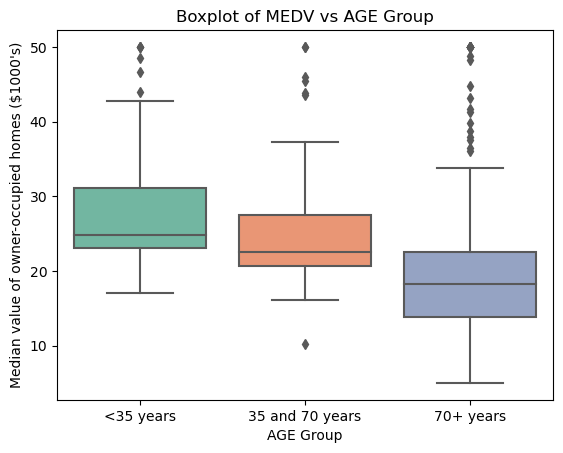

In [7]:
# Discretize the AGE variable
bins = [0, 35, 70, float('inf')] #flaot('inf') :posititve infinity
labels = ['<35 years', '35 and 70 years', '70+ years']
df['AGE_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Create the boxplot
sns.boxplot(data=df, x='AGE_Group', y='MEDV', palette='Set2')
plt.title("Boxplot of MEDV vs AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("Median value of owner-occupied homes ($1000's)")
plt.show()

**Q-4**: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

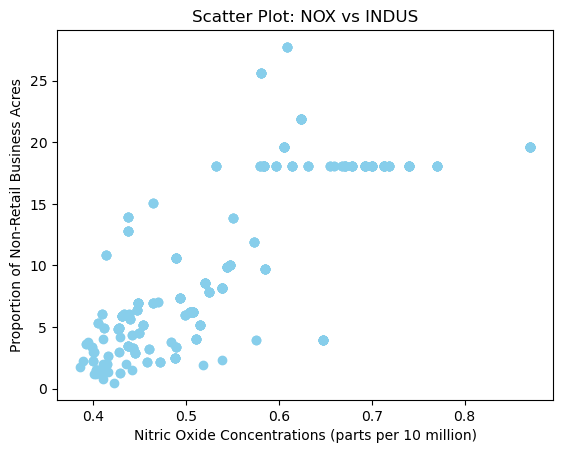

In [8]:
# Create a scatter plot
plt.scatter(df['NOX'], df['INDUS'], color='skyblue')
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("Nitric Oxide Concentrations (parts per 10 million)")
plt.ylabel("Proportion of Non-Retail Business Acres")
plt.show()

**Q-5**: Create a histogram for the pupil to teacher ratio variable

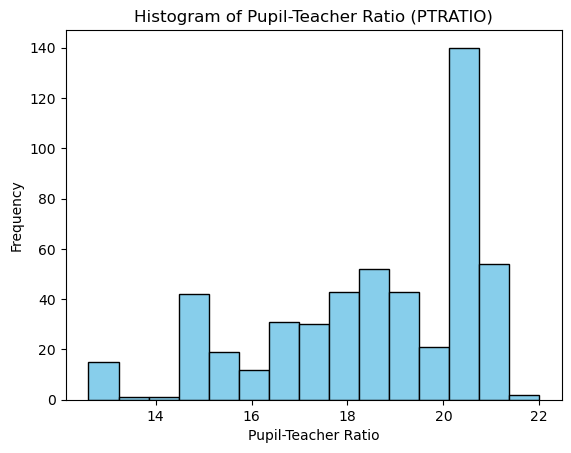

In [9]:
# Create a histogram
plt.hist(df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

### Question 1
Is there a significant difference in median value of houses bounded by the Charles river or not?

**Stating Hypothesis**
-   Null Hypothesis: there is no difference in between the median value of houses bounded by Charles river and not bounded.

-   Alternative Hypothesis: there is a difference in between the median value of houses bounded by Charles river and not bounded.

**α = 0.05**

In [10]:
# Assuming 'charles_bounded' is a boolean column indicating whether the house is bounded by the Charles river
group1 = df[df['CHAS'] == 1]['MEDV']
group0 = df[df['CHAS'] == 0]['MEDV']

# Perform the two-sample t-test
t_stat, p_value = scipy.stats.ttest_ind(group1, group0)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"At alpha = {alpha} and p_value = {p_value:.4f}, we reject the null hypothesis. There is a significant difference in median values.")
else:
    print(f"At alpha = {alpha} and p_value = {p_value:.4f}, we fail to reject the null hypothesis. There is no significant difference in median values.")


At alpha = 0.05 and p_value = 0.0001, we reject the null hypothesis. There is a significant difference in median values.


### Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

**Stating Hypothesis**
-    Null Hypothesis: There is no difference in median values of houses for occupied units built prior to 1940.
-    Alternative Hypothesis: There is a difference in median values of houses for occupied units built prior to 1940.

**alpha = 0.05**

In [11]:
df.loc[(df.AGE > 81), 'age_span'] = 'before 1940'
df.loc[(df.AGE <= 81), 'age_span'] = 'after 1940'

stats, p_value = scipy.stats.levene(df[df.age_span=='before 1940']['MEDV'],
                   df[df.age_span=='after 1940']['MEDV'],
                   center='mean')

# Determine if the difference is statistically significant (using a common significance level of 0.05)
alpha = 0.05
if p_value < alpha:
    print(f"At alpha = {alpha} and p_value = {p_value:.4f},There is a significant difference in median values of houses for different AGE groups.")
else:
    print(f"At alpha = {alpha} and p_value = {p_value:.4f},There is no significant difference in median values of houses for different AGE groups.")

At alpha = 0.05 and p_value = 0.2083,There is no significant difference in median values of houses for different AGE groups.


### Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

**Stating Hypothesis:**
-    Null Hypothesis: There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
-    Alternative Hypothesis: There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

**alpha = 0.05**

In [12]:
# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = scipy.stats.pearsonr(df['NOX'], df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"At alpha = {alpha} and p_value = {p_value:.4f},There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres.")
else:
    print(f"At alpha = {alpha} and p_value = {p_value:.4f},There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres.")


Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061238693e-98
At alpha = 0.05 and p_value = 0.0000,There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres.


### Question 4
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
# Add a constant term to the independent variable
X = sm.add_constant(df['DIS'])
y = df['MEDV']

# Fit the regression model
model = sm.OLS(df['MEDV'], X).fit()

# Print the regression summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        03:23:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The weighted distance to the five Boston employment centers has an additional effect of 1.0916 units on the median value of owner-occupied homes.